In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# !pip install pycountry

import pycountry

### 2023 Data Scientists Salary dataset

- work_year:The year the salary was paid.

- experience_level: The experience level in the job during the year.

- employment_type: The type of employment for the role.

- job_title: The role worked in during the year.

- salary: The total gross salary amount paid.

- salary_currency: The currency of the salary paid as an ISO 4217 currency code.

- salaryinusd: The salary in USD.

- employee_residence: Employee's primary country of residence during the work year as an ISO 3166 country code.

- remote_ratio:The overall amount of work done remotely.

- company_location: The country of the employer's main office or contracting branch.

- company_size: The median number of people that worked for the company during the year.

In [2]:
df = pd.read_csv("ds_salaries.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


- **Analysis Steps**:

I. **Dataset Information**

    - Display Overview
    - Check Missing Values and Data Types
    - Dataset Size
    - Basic Statistics
    
II. **Data Wrangling**

    - Country Codes
    - Employment Types
    - Remote Ratio
    - Experience Level

III. **Feature Engineering**

    - Inflation Rates
    - Job Categorization

IV. **Univariate Analysis**

    - Salary Histogram
    - Job Category Boxplot
    - Experience Level Box Plot
    - Salary by Company Size Bar Chart

V. **Multivariate Analysis**

    - Salary by Job Type and Company Size Bar Chart
    - Salary over Time by Job Category Line Graph
    - Salary by Experience Level and Employment Type Bar Chart
    - Work Environment by Company Size Pie Charts
    - Salary by Experience Level by Company Size Bar Chart

VI. **Geographic Analysis**

    - Salary by Employee Location Choropleth Map
    - Salary by Company Location Bar Chart
    - Top 10 Company Location Salaries, Counts Table
    - Top 10 Employee Location and Job Categories Pivot Table

### Basic statistics analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df[df.duplicated(keep=False)]

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M
...,...,...,...,...,...,...,...,...,...,...,...
3441,2022,SE,FT,Data Engineer,115000,USD,115000,US,100,US,M
3502,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
3586,2021,MI,FT,Data Engineer,200000,USD,200000,US,100,US,L
3665,2021,MI,FT,Data Scientist,76760,EUR,90734,DE,50,DE,L


In [8]:
df.duplicated().sum() ## large volume of duplicate data

1171

In [9]:
df.drop_duplicates(keep='first', inplace=True)

In [10]:
df.info() ## 

<class 'pandas.core.frame.DataFrame'>
Index: 2584 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           2584 non-null   int64 
 1   experience_level    2584 non-null   object
 2   employment_type     2584 non-null   object
 3   job_title           2584 non-null   object
 4   salary              2584 non-null   int64 
 5   salary_currency     2584 non-null   object
 6   salary_in_usd       2584 non-null   int64 
 7   employee_residence  2584 non-null   object
 8   remote_ratio        2584 non-null   int64 
 9   company_location    2584 non-null   object
 10  company_size        2584 non-null   object
dtypes: int64(4), object(7)
memory usage: 242.2+ KB


In [11]:
3755 - 2584 ## rows deleted

1171

## Feature Engineering

In [12]:
# Converting column values.

In [13]:
df['experience_level'] = df.experience_level.replace({'SE': 'Senior', 'MI': 'Mid_Level', 'EN': 'Entry_Level', 'EX': 'Executive'})

df['employment_type'] = df.employment_type.replace({'FT':'Full_time', 'PT':'Part_time', 'CT':'Contract', 'FL':'Freelance'})

df['company_location'] = df.company_location.apply(lambda x: pycountry.countries.get(alpha_2=x).name if pycountry.countries.get(alpha_2=x) else x)

df['employee_residence'] = df.employee_residence.apply(lambda x: pycountry.countries.get(alpha_2=x).name if pycountry.countries.get(alpha_2=x) else x)

df['work_environment'] = df.remote_ratio.replace({100:'Remote',50:'Hybrid',0:'On Site'})

In [14]:
df['company_size'] = df.company_size.replace({'L': 'Large', 'M':'Medium', 'S':'Small'})

In [15]:
def convert_job_categories(job_category):
    keywords = ['Analyst', 'Scientist', 'Engineer', 'Architect']
    
    for keyword in keywords:
        if keyword in job_category:
            return keyword
    return 'Other'

In [16]:
df['job_title'] = df.job_title.apply(convert_job_categories)

### Columns which needed encoding is completed.

In [17]:
df.head(5)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,work_environment
0,2023,Senior,Full_time,Scientist,80000,EUR,85847,Spain,100,Spain,Large,Remote
1,2023,Mid_Level,Contract,Engineer,30000,USD,30000,United States,100,United States,Small,Remote
2,2023,Mid_Level,Contract,Engineer,25500,USD,25500,United States,100,United States,Small,Remote
3,2023,Senior,Full_time,Scientist,175000,USD,175000,Canada,100,Canada,Medium,Remote
4,2023,Senior,Full_time,Scientist,120000,USD,120000,Canada,100,Canada,Medium,Remote


In [18]:
## Dropping columns 

df.drop(['remote_ratio'], inplace=True, axis = 1)

In [19]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,work_environment
0,2023,Senior,Full_time,Scientist,80000,EUR,85847,Spain,Spain,Large,Remote
1,2023,Mid_Level,Contract,Engineer,30000,USD,30000,United States,United States,Small,Remote


### Seperating columns

In [20]:
# seperating the numerical and categorical columns

num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(exclude='number')

## Univeriate Analysis.

### Exploring numerical columns

In [21]:
# plt.rcParams['figure.figsize'] = [5,4]
sns.set_palette('rocket')

In [22]:
num_cols.head(2)

,work_year,salary,salary_in_usd
0,2023,80000,85847
1,2023,30000,30000


In [23]:
df.work_year.value_counts()

work_year
2023    1156
2022    1125
2021     228
2020      75
Name: count, dtype: int64

<Axes: xlabel='work_year', ylabel='count'>

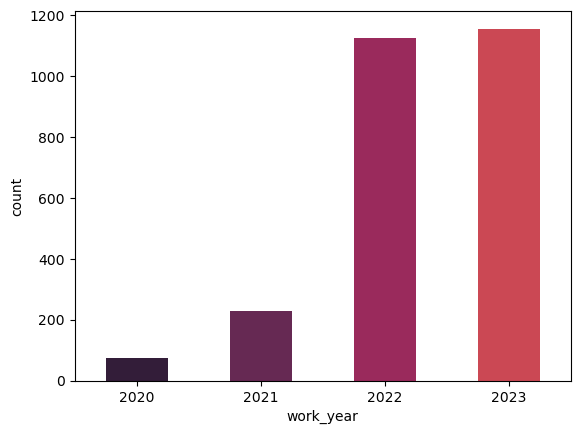

In [24]:
# plt.figure(figsize=(4,3))
sns.color_palette('flare')
sns.countplot(x = df.work_year, width = 0.5)

<Axes: xlabel='salary_in_usd', ylabel='Count'>

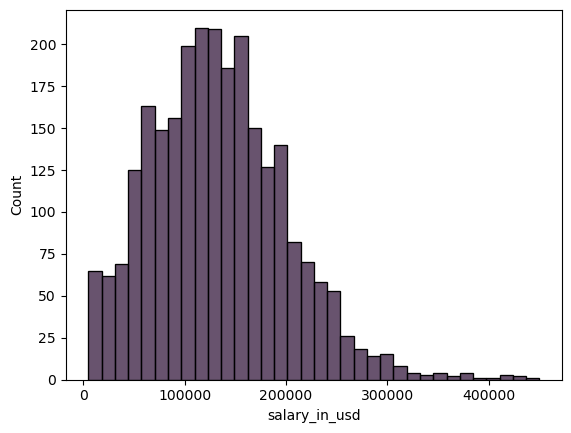

In [25]:
sns.histplot(df.salary_in_usd) ## right skewed 

### Exploring Categorical Columns.

In [26]:
cat_cols

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size,work_environment
0,Senior,Full_time,Scientist,EUR,Spain,Spain,Large,Remote
1,Mid_Level,Contract,Engineer,USD,United States,United States,Small,Remote
2,Mid_Level,Contract,Engineer,USD,United States,United States,Small,Remote
3,Senior,Full_time,Scientist,USD,Canada,Canada,Medium,Remote
4,Senior,Full_time,Scientist,USD,Canada,Canada,Medium,Remote
...,...,...,...,...,...,...,...,...
3750,Senior,Full_time,Scientist,USD,United States,United States,Large,Remote
3751,Mid_Level,Full_time,Scientist,USD,United States,United States,Large,Remote
3752,Entry_Level,Full_time,Scientist,USD,United States,United States,Small,Remote
3753,Entry_Level,Contract,Analyst,USD,United States,United States,Large,Remote


In [27]:
df['employment_type'].value_counts()

employment_type
Full_time    2547
Part_time      17
Contract       10
Freelance      10
Name: count, dtype: int64

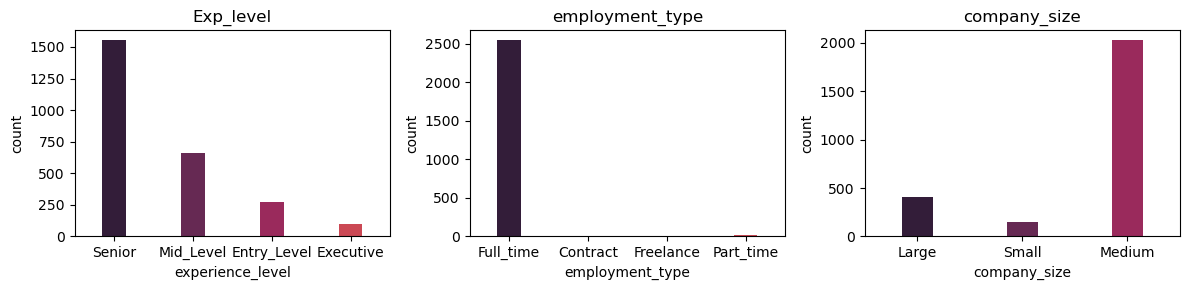

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3), gridspec_kw={'width_ratios': [1, 1, 1]})

sns.countplot(x=df.experience_level, width=0.3, ax=axes[0])
axes[0].set_title('Exp_level')

sns.countplot(x=df.employment_type, width=0.3, ax=axes[1])
axes[1].set_title('employment_type')

sns.countplot(x=df.company_size, width=0.3, ax=axes[2])
axes[2].set_title('company_size')

plt.tight_layout()
plt.show()

## Multivariate Analysis.

<Axes: xlabel='job_title', ylabel='salary'>

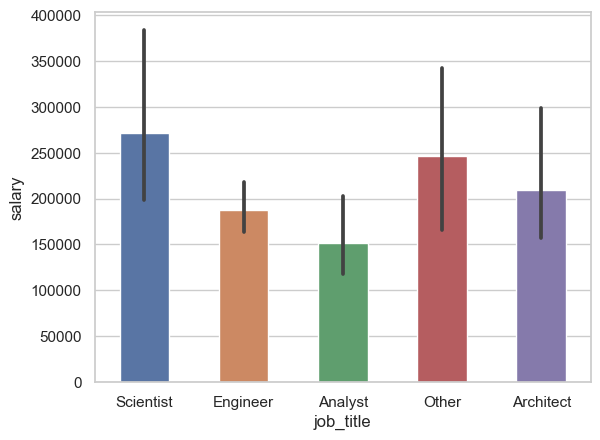

In [29]:
sns.set_theme(style="whitegrid")

sns.barplot(x = df.job_title, y = df.salary, width = 0.5)

### In above graph it is clear that Analyst earns less on an average while Data scientists earns more. 

In [30]:
df.head(2)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,company_location,company_size,work_environment
0,2023,Senior,Full_time,Scientist,80000,EUR,85847,Spain,Spain,Large,Remote
1,2023,Mid_Level,Contract,Engineer,30000,USD,30000,United States,United States,Small,Remote


C:\Users\nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


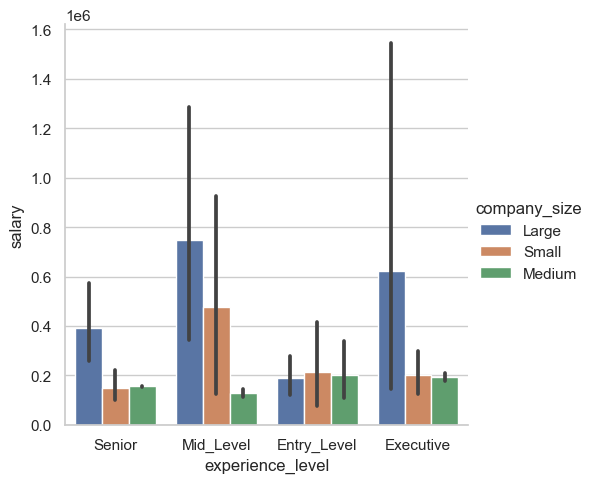

In [31]:
## relation between salary, experience level according to company size.

sns.catplot(data=df, kind="bar", x="experience_level", y="salary", hue="company_size")

### From above graph it is clear that senior level employe has high salary in large company, mid level employee has high salary in small company and executive level employee has high salary in large company. Entry level candidates has average salary in varients of comapny size

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


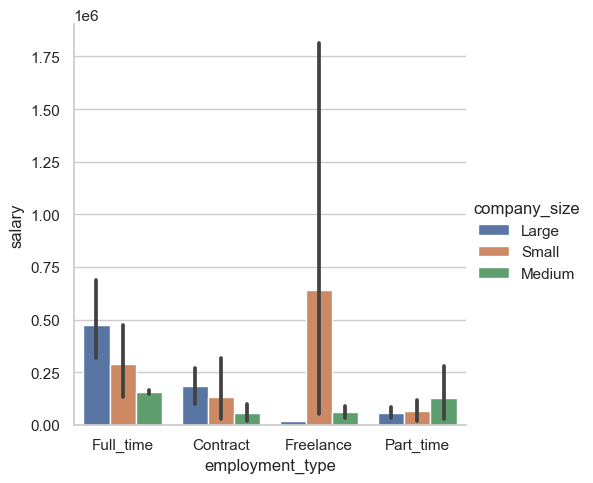

In [32]:
## relation between salary, employment type according to company size.

sns.catplot(data=df, kind="bar", x="employment_type", y="salary", hue="company_size")

### Above graph tells us that a person working for small company as freelance earns highest, while a employee working in large company on full_time basis earns little less than freelance employee.

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


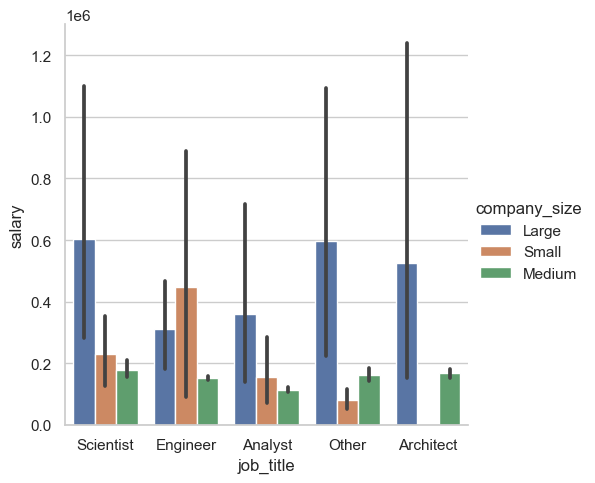

In [33]:
sns.catplot(data=df, kind="bar", x="job_title", y="salary", hue="company_size")

### Now above graph shows that data scientist and architect working in large company earns highest along with other category employees

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


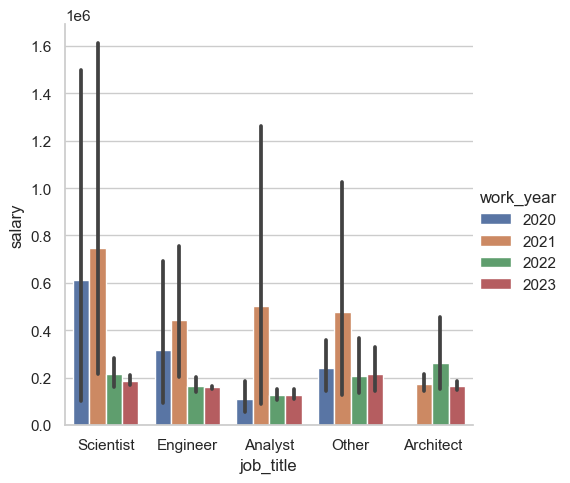

In [34]:
sns.catplot(data=df, kind="bar", x="job_title", y="salary", hue="work_year")

### In above graph the salary in year 2021 was highest for every job category, data scientist being the highest.

C:\Users\nancy\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


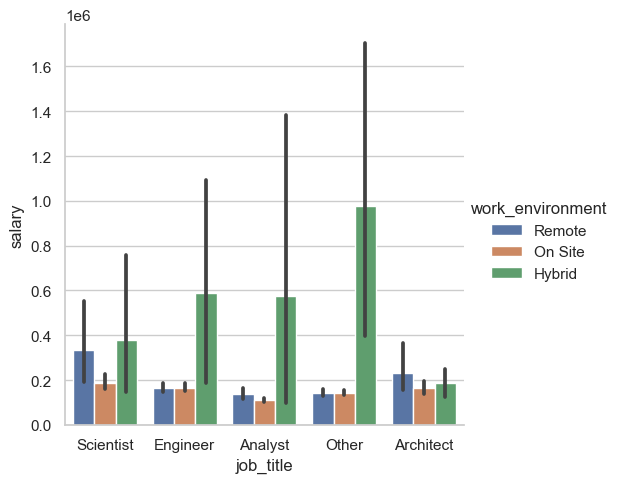

In [38]:
sns.catplot(data=df, kind="bar", x="job_title", y="salary", hue="work_environment")

### Employees in other category working in hybrid category is earning highest followed by engineers. While data scientists working in remote location is earning highest.

In [43]:
df.to_excel('Cleaned_salary_data.xlsx', index = False)